IMPORTING REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import string
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df  = pd.read_csv('../input/amazon-alexa-reviews/amazon_alexa.tsv',sep='\t') # for kaggle
# df  = pd.read_csv('amazon_alexa.tsv',sep='\t') # for local storage
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


PLOTS

<AxesSubplot:>

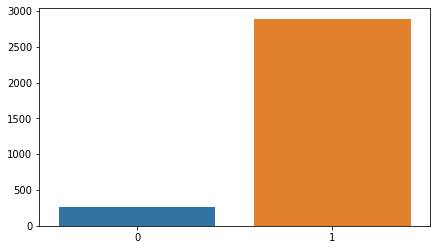

In [3]:
fig = plt.figure(figsize=(7, 4))

d = df['feedback'].value_counts()

x = d.keys().to_list()
y = d.values.tolist()
sns.barplot(x=x, y=y)

<AxesSubplot:xlabel='rating', ylabel='Count'>

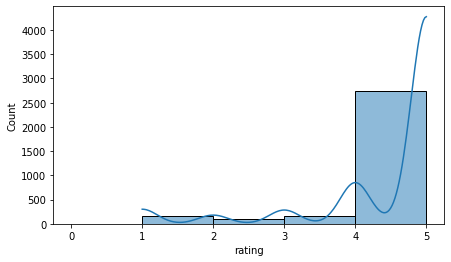

In [4]:
# Plot the graph of Ratings distibution.
fig = plt.figure(figsize=(7, 4))
sns.histplot(data=df, x='rating', bins=5, kde=True, binrange=(0, 5))

TEXT ANALYSIS STARTS HERE

In [5]:
review_text = df.drop(['rating','date','variation','feedback'],axis=1)
review_text

,verified_reviews
0,Love my Echo!
1,Loved it!
2,"Sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...
4,Music
...,...
3145,"Perfect for kids, adults and everyone in betwe..."
3146,"Listening to music, searching locations, check..."
3147,"I do love these things, i have them running my..."
3148,Only complaint I have is that the sound qualit...


LOWERCASING

In [6]:
df['review_lower'] = review_text.apply(lambda x: x.astype(str).str.lower())
df['review_lower']

0                                           love my echo!
1                                               loved it!
2       sometimes while playing a game, you can answer...
3       i have had a lot of fun with this thing. my 4 ...
4                                                   music
                              ...                        
3145    perfect for kids, adults and everyone in betwe...
3146    listening to music, searching locations, check...
3147    i do love these things, i have them running my...
3148    only complaint i have is that the sound qualit...
3149                                                 good
Name: review_lower, Length: 3150, dtype: object

REMOVAL OF PUNCTUATION

In [7]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df['review_nopunc']= df['review_lower'].apply(lambda x: remove_punctuation(x))

df['review_nopunc']

0                                            love my echo
1                                                loved it
2       sometimes while playing a game you can answer ...
3       i have had a lot of fun with this thing my 4 y...
4                                                   music
                              ...                        
3145      perfect for kids adults and everyone in between
3146    listening to music searching locations checkin...
3147    i do love these things i have them running my ...
3148    only complaint i have is that the sound qualit...
3149                                                 good
Name: review_nopunc, Length: 3150, dtype: object

REMOVAL OF EMOJIS AND EMOTICONS

In [8]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

df['review_noemoji'] = df['review_nopunc'].apply(lambda x: remove_emoji(x))
df['review_noemoji']

0                                            love my echo
1                                                loved it
2       sometimes while playing a game you can answer ...
3       i have had a lot of fun with this thing my 4 y...
4                                                   music
                              ...                        
3145      perfect for kids adults and everyone in between
3146    listening to music searching locations checkin...
3147    i do love these things i have them running my ...
3148    only complaint i have is that the sound qualit...
3149                                                 good
Name: review_noemoji, Length: 3150, dtype: object

In [9]:
EMOTICONS=[':-<',':->']
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

df['review_noemoticons'] = df['review_noemoji'].apply(lambda x: remove_emoticons(x))

df['review_noemoticons']

0                                            love my echo
1                                                loved it
2       sometimes while playing a game you can answer ...
3       i have had a lot of fun with this thing my 4 y...
4                                                   music
                              ...                        
3145      perfect for kids adults and everyone in between
3146    listening to music searching locations checkin...
3147    i do love these things i have them running my ...
3148    only complaint i have is that the sound qualit...
3149                                                 good
Name: review_noemoticons, Length: 3150, dtype: object

TOKENIZATION

In [10]:
#defining function for tokenization
import re
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
#applying function to the column
df['msg_tokenized']= df['review_noemoticons'].apply(lambda x: tokenization(x))

df['msg_tokenized']

0                                          [love my echo]
1                                              [loved it]
2       [sometimes while playing a game you can answer...
3       [i have had a lot of fun with this thing my 4 ...
4                                                 [music]
                              ...                        
3145    [perfect for kids adults and everyone in between]
3146    [listening to music searching locations checki...
3147    [i do love these things i have them running my...
3148    [only complaint i have is that the sound quali...
3149                                               [good]
Name: msg_tokenized, Length: 3150, dtype: object

REMOVAL OF STOP WORDS

In [11]:
from nltk.corpus import stopwords
nltk.download('stopwords')
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\Sauhard
[nltk_data]     Saini\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [12]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    no_stop = " ".join([word for word in str(text).split() if word not in STOPWORDS])
    return no_stop

df["text_wo_stop"] = df["msg_tokenized"].apply(lambda x: remove_stopwords(x))
df["text_wo_stop"]

0                                           ['love echo']
1                                            ['loved it']
2       ['sometimes playing game answer question corre...
3       ['i lot fun thing 4 yr old learns dinosaurs co...
4                                               ['music']
                              ...                        
3145             ['perfect kids adults everyone between']
3146    ['listening music searching locations checking...
3147    ['i love things running entire home tv lights ...
3148    ['only complaint sound quality isnt great most...
3149                                             ['good']
Name: text_wo_stop, Length: 3150, dtype: object

STEMMING

In [13]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["text_stemmed"] = df["text_wo_stop"].apply(lambda x: stem_words(x))
df["text_stemmed"]

0                                           ['love echo']
1                                             ['love it']
2       ['sometim play game answer question correctli ...
3       ['i lot fun thing 4 yr old learn dinosaur cont...
4                                               ['music']
                              ...                        
3145                ['perfect kid adult everyon between']
3146    ['listen music search locat check time look we...
3147    ['i love thing run entir home tv light thermos...
3148    ['onli complaint sound qualiti isnt great most...
3149                                             ['good']
Name: text_stemmed, Length: 3150, dtype: object

LEMMATIZATION

In [14]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["text_lemmatized"] = df["text_wo_stop"].apply(lambda x: lemmatize_words(x))
df["text_lemmatized"]

[nltk_data] Downloading package wordnet to C:\Users\Sauhard
[nltk_data]     Saini\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0                                           ['love echo']
1                                            ['loved it']
2       ['sometimes playing game answer question corre...
3       ['i lot fun thing 4 yr old learns dinosaur con...
4                                               ['music']
                              ...                        
3145               ['perfect kid adult everyone between']
3146    ['listening music searching location checking ...
3147    ['i love thing running entire home tv light th...
3148    ['only complaint sound quality isnt great most...
3149                                             ['good']
Name: text_lemmatized, Length: 3150, dtype: object

In [15]:
df.head()

,rating,date,variation,verified_reviews,feedback,review_lower,review_nopunc,review_noemoji,review_noemoticons,msg_tokenized,text_wo_stop,text_stemmed,text_lemmatized
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo!,love my echo,love my echo,love my echo,[love my echo],['love echo'],['love echo'],['love echo']
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it!,loved it,loved it,loved it,[loved it],['loved it'],['love it'],['loved it']
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"sometimes while playing a game, you can answer...",sometimes while playing a game you can answer ...,sometimes while playing a game you can answer ...,sometimes while playing a game you can answer ...,[sometimes while playing a game you can answer...,['sometimes playing game answer question corre...,['sometim play game answer question correctli ...,['sometimes playing game answer question corre...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing. my 4 ...,i have had a lot of fun with this thing my 4 y...,i have had a lot of fun with this thing my 4 y...,i have had a lot of fun with this thing my 4 y...,[i have had a lot of fun with this thing my 4 ...,['i lot fun thing 4 yr old learns dinosaurs co...,['i lot fun thing 4 yr old learn dinosaur cont...,['i lot fun thing 4 yr old learns dinosaur con...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,music,music,music,[music],['music'],['music'],['music']


BAG OF WORDS VECTORIZER

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer()
data_bow = bow.fit_transform(df['verified_reviews'])
print("n_samples: %d, n_features: %d" % data_bow.shape)

n_samples: 3150, n_features: 4044


In [17]:
print(bow.get_feature_names())

['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '50', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '8gb', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'about', 'above', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'actions', 'activat

c:\Users\Sauhard Saini\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
print(data_bow.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


TF-IDF VECTORIZER

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer()
data_tf = tf_idf.fit_transform(df['verified_reviews'])
print("n_samples: %d, n_features: %d" % data_tf.shape)

n_samples: 3150, n_features: 4044


In [20]:
print(tf_idf.get_feature_names())

['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '50', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '8gb', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'about', 'above', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'actions', 'activat

In [21]:
print(data_tf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
